In [ ]:
import sys
import os
mp = os.path.abspath(os.path.join('/content/drive/My Drive/GraduationThesis/gitrepo/GraduationThesis/'))
sys.path.append(mp)

In [ ]:
import torch
from datetime import date, datetime
import numpy as np
from modules import Reconstruction, Visualization, Utils, Network

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Define data set name and constraint type
dataset_name = 'riderr'
current_datef = '20210413'
current_dateg = date.today().strftime("%Y%m%d")
# current_date = '20210330'
attemptf = '8'
attemptg = '15'
epoch = 15000

print(datetime.now())

2021-04-13 04:03:27.992235


In [ ]:
# Load points
filename = mp + '/dataset/2d/' + dataset_name + '.vert'
data = Utils.read_txt2(filename, k_distance=50, device=device)
# data = Utils.circle_dataset(device=device)

In [ ]:
traineddata_path_f = mp + '/models/' + current_datef + '_' + attemptf + '_f' + '.traineddata'
traineddata_path_g = mp + '/models/' + current_dateg + '_' + attemptg + '_g' + '.traineddata'
# traineddata_path = None
modelf, optimizer, scheduler = Network.load_model_f(traineddata_path_f, dimension=2, device=device)
model, optimizer, scheduler = Network.load_model_g(traineddata_path_g, modelf, dimension=2, device=device)

Model loaded
No model found. New model created


In [ ]:
outfile = mp + '/figures/loss_value/' + current_dateg + '_' + attemptg + '_g' + '.npy'
# outfile = None
model, optimizer, scheduler, loss_value = Reconstruction.train_constraint(epoch,
                                                          model,
                                                          optimizer,
                                                          scheduler,
                                                          batch_size=None,
                                                          data=data,
                                                          loss_output_path=outfile,
                                                          device=device)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# attempt = '17'
# current_date = date.today().strftime("%Y%m%d")
save_path = mp + '/models/' + current_dateg + '_' + attemptg + '_g' + '.traineddata'
Network.save_model(save_path, model, optimizer, scheduler)

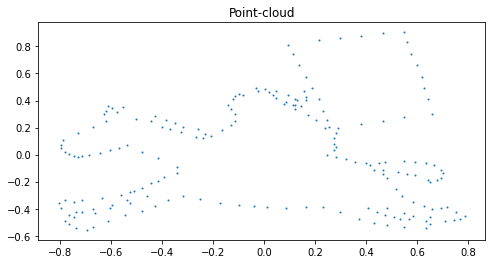

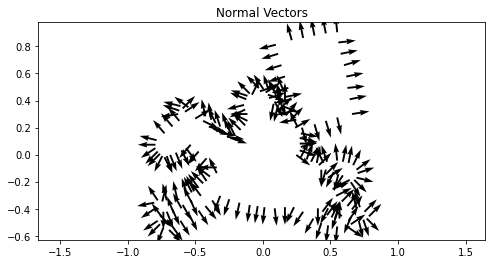

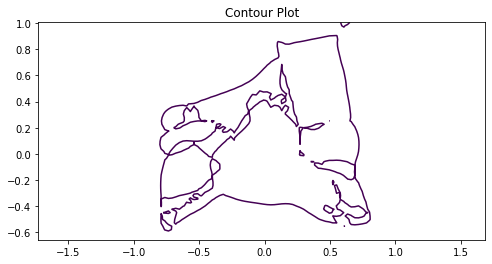

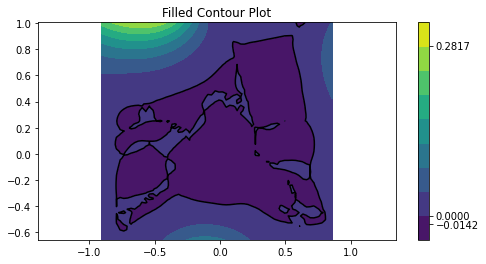

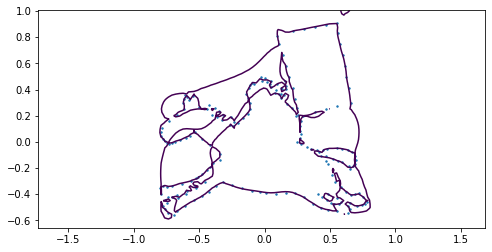

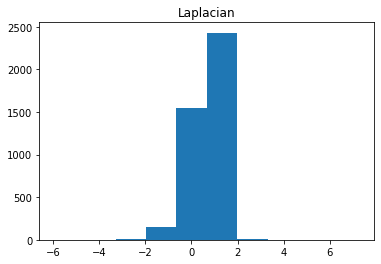

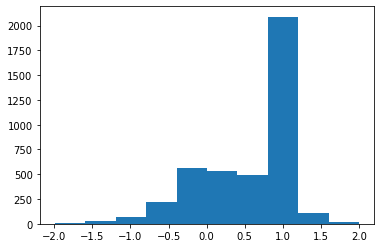

In [ ]:
constraint_output_path = None
vtk_output_path = None
Visualization.visualize2(model, data, 
                         constraint_output_path=constraint_output_path, 
                         vtk_output_path=vtk_output_path,
                         scatter=True, vecfield=True, surface=True, filled_contour=True,
                         device=device)

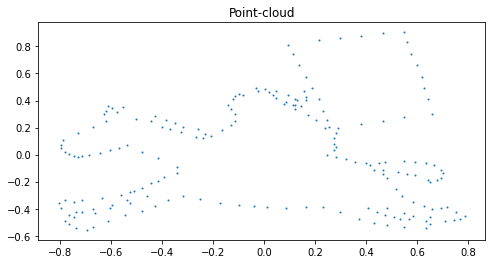

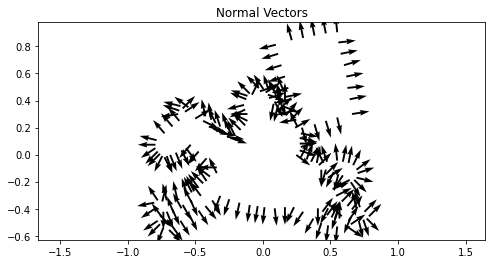

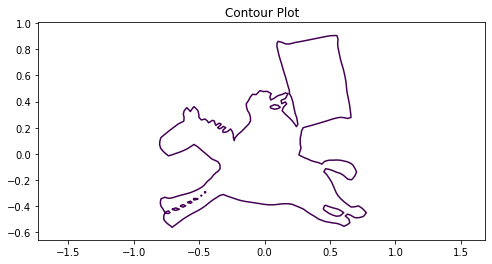

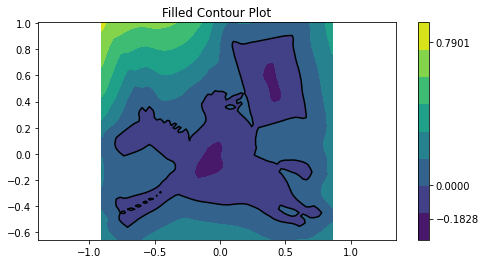

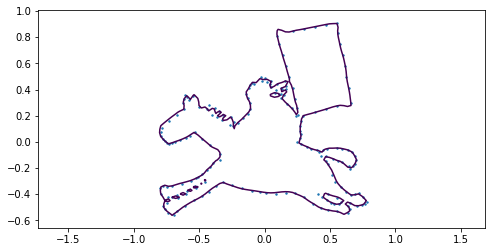

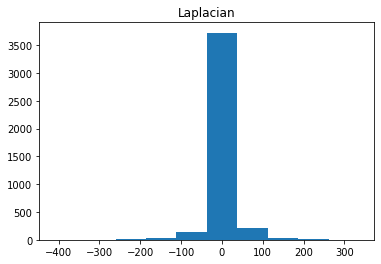

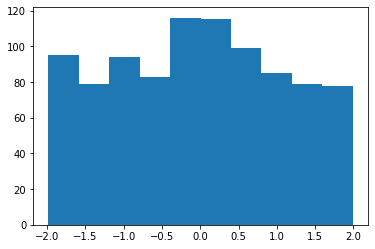

In [ ]:
# Result from training the boudary only
Visualization.visualize2(modelf, data, 
                         constraint_output_path=constraint_output_path, 
                         vtk_output_path=vtk_output_path,
                         scatter=True, vecfield=True, surface=True, filled_contour=True,
                         device=device)